#**Define the problem? What is the input? What is the output?**

it is a classification problem to classify the real  and fake news , the input is set of features such as id, text that contain title and the output is label 

# **What data mining function is required?**
classification problem

# **What could be the challenges?**

1.  clean text because text contain html tags, digits , non-English letters,punctuation
2.  the text is big , so that it take some time to train the model on this data 
3. convert the string into vector 
4. using of steaming and lemmatization preprocessing


# **What is the impact?**

there are many false information on internet , these information caused many social problems , so that we will build the model to detect the false information on internet 

# **What is an ideal solution?**
building a pipline that contain tf-idf vectorizer and logistic regression model and use Randomized search to get the best hyperparameters 


# **What is the experimental protocol used and how was it carried out? What preprocessing steps are used?**



1.   import the required libraries
2.   Read the data
3.   make preprocessing such as
      *   clean the data from html tags , digits, punctuation
      *   steaming preprocessing
      *   lemmatization preprocessing

4.   building set of models with serch space 
2.   choose the model with the best score of AUC-ROC

# **What is the difference between Character n-gram and Word n-gram? Which one tends to suffer more from the OOV issue ?**
- Character n-gram : it is set of characters taken from a text or speech sample
- Word n-gram : it is set of words taken from a text or speech sample

- Character n-grams tend to handle OOV words better, but may suffer from the curse of dimensionality, while word n-grams may not handle OOV words as well, but can capture more complex syntactic and semantic relationships between words.


# **What is the difference between stop word removal and stemming? Are these techniques language-dependent**?
- stemming :  remove suffix and prefix without remove the whole words
- stop words removal : remove predefined words such as "a,an,the"
- both are language dependant , because grammer and stop words in English not like grammer and stop word in another language 

# **Is tokenization techniques language dependent? Why?**
NO, beacuse of the tokenization mean divide the text into set of words based on specific delimiter , so that tokens created based on delimiter , not the language

# **What is the difference between count vectorizer and tf-idf vectorizer? Would it be feasible to use all possible n-grams? If not, how should you select them?**

- count vectorizer : convert the words into vector based on the count of each word in text
-  tf-idf vectorizer :  count how many time the word appear in the text (tf) **divided by** count how many time the word appear in the whole document(idf)

- it wouldn't be feasiable but we  can select them by using some of search space method techniques like Grid search

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **import libraries**

In [ ]:
# import the required libraries
import pandas as pd
import numpy as np
from nltk import word_tokenize, pos_tag 
from nltk.corpus import stopwords, wordnet 
from nltk.stem import WordNetLemmatizer
import nltk
import re
import string
from nltk.stem import PorterStemmer
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  RandomizedSearchCV
from xgboost import XGBClassifier
from nltk.tokenize import word_tokenize
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# The nltk.download() function is used to download NLTK data and resources
nltk.download('omw-1.4')
nltk.download('all')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_gramm

True

In [ ]:
"""
This command removes the directory 
/usr/share/nltk_data/corpora/wordnet and all its contents,
and then recursively copies the directory 
/usr/share/nltk_data/corpora/wordnet2022 to /usr/share/nltk_data/corpora/wordnet."
"""
!cp -rf /usr/share/nltk_data/corpora/wordnet2022 /usr/share/nltk_data/corpora/wordnet 
#temp fix for lookup error.

# **Read The Data**

In [ ]:
# reading "xy_train.csv" that contain id , text , label
train = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a3/xy_train.csv', sep=",", na_values=[""])
# reading "x_test.csv" that contai id , text
test = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a3/x_test.csv',index_col='id')

# **Explore The Data**

In [ ]:
# count frequent for each class in label
train.label.value_counts()

0    32172
1    27596
2      232
Name: label, dtype: int64

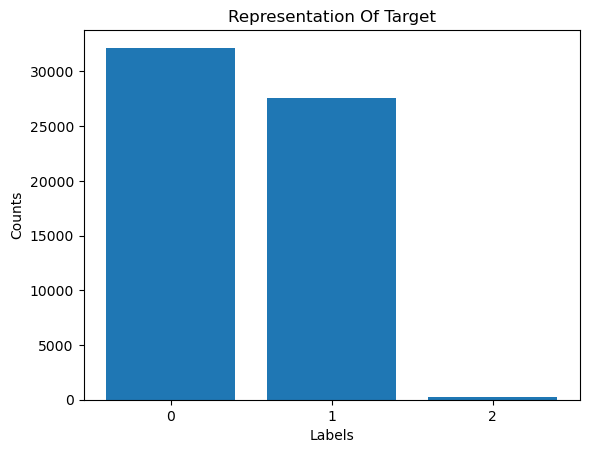

In [ ]:
# the label contain three values (0,1,2)
# using Matplotlib to draw the count of 0,1 and 2
import matplotlib.pyplot as plt
plt.bar(["0", "1", "2"], train["label"].value_counts())
plt.title("Representation Of Target")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

In [ ]:
# This command drops all the rows from the train DataFrame where the label column has a value of 2.
# the label of train data contain three values (0,1,2)
# i will remove the value "2" from label  because we predict if a specific reddit post is fake news or not(0 or 1)
train = train.drop(train[train.label == 2].index)

In [ ]:
# count frequent for each class in label after drop the value "2" from label
train.label.value_counts()

0    32172
1    27596
Name: label, dtype: int64

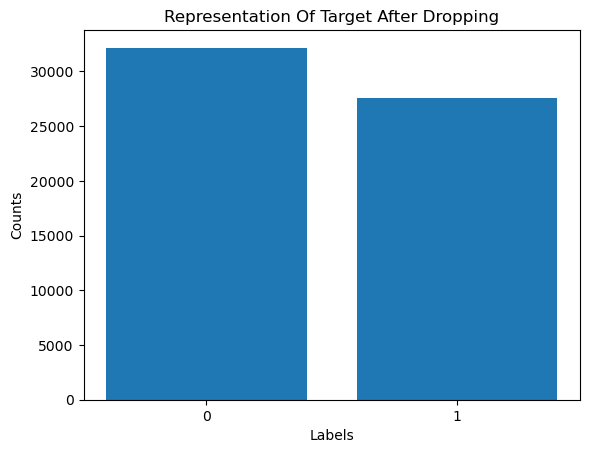

In [ ]:
# the label contain three values (0,1)
# using Matplotlib to draw the count of 0,1 
import matplotlib.pyplot as plt
plt.bar(["0" , "1"], train["label"].value_counts())
plt.title("Representation Of Target After Dropping")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.show()

In [ ]:
# converts the label column in the train DataFrame to the int8 data type
train.label = train.label.astype('int8')

In [ ]:
# catch id of test id 
id = test.index

In [ ]:
# show train data that contain "id,text,label"
train

,id,text,label
0,265723,A group of friends began to volunteer at a hom...,0
1,284269,British Prime Minister @Theresa_May on Nerve A...,0
2,207715,"In 1961, Goodyear released a kit that allows P...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Y...",0
...,...,...,...
59995,70046,Finish Sniper Simo H盲yh盲 during the invasion o...,0
59996,189377,Nigerian Prince Scam took $110K from Kansas ma...,1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy...,0
59998,140950,Julius Caesar upon realizing that everyone in ...,0


In [ ]:
# show test data that contain "id,text"
# no label data
test

,text
id,
0,stargazer
1,yeah
2,PD: Phoenix car thief gets instructions from Y...
3,"As Trump Accuses Iran, He Has One Problem: His..."
4,"""Believers"" - Hezbollah 2011"
...,...
59146,Bicycle taxi drivers of New Delhi
59147,Trump blows up GOP's formula for winning House...
59148,Napoleon returns from his exile on the island ...


In [ ]:
# print the shape of train 
print(train.shape)

(59768, 3)


In [ ]:
# print the shape of test 
print(test.shape)

(59151, 1)


# **Clean Data**

In [ ]:
"""
building function to clean data from
1- html tags
2- digits
3- special characters
4- links 
5- all whitespaces
6-single letter character
7- Tokenize the text into words

"""
def clean_text(text, for_embedding):
    # a regular expression pattern that matches one or more whitespace characters (spaces, tabs, and newlines)
    #re.IGNORECASE flag is used to make the regular expression case-insensitive
    whitespace = re.compile(r"\s+", re.IGNORECASE)
    # a regular expression pattern that matches HTML or XML tags
    tags = re.compile(r"<.*?>") 
    # a regular expression pattern that matches any character that is not a letter (uppercase or lowercase), a digit
    ASCII = re.compile(r"[^A-Za-zÀ-ž0-9]+", re.IGNORECASE)
    # a regular expression pattern that matches any single character (i.e., a character that is not part of a word)
    single_char = re.compile(r"\b^[^A-Za-zÀ-ž0-9]+\b", re.IGNORECASE) 
    if for_embedding:
        # Keep punctuation
        ASCII = re.compile(r"[^A-Za-zÀ-ž,.!? ]", re.IGNORECASE) 
        single_char = re.compile(r"\b[A-Za-zÀ-ž,.!?]\b", re.IGNORECASE)
    
    # Remove any HTML tags
    text = re.sub(tags, ' ', text)

    # Keep only ASCII + European Chars and whitespace, no digits
    text = re.sub(ASCII, ' ', text)

    # Remove single letter chars
    text = re.sub(single_char, ' ', text)

    # Convert all whitespaces (tabs etc.) to single wspace
    text = re.sub(whitespace, ' ', text)

    # Tokenize the text into words
    tokens = word_tokenize(text)
 
    return tokens 

In [ ]:
#print stop_words
stop_words = set(stopwords.words("english"))
print(stop_words)

{'of', 'should', 'which', 'their', 'no', 'here', 're', 'all', 'she', 'doesn', 'again', 'very', 'both', "that'll", 'll', 'between', 'them', 'until', "you've", 'where', 'will', 'hadn', 'm', 'can', 'why', 'weren', 'theirs', 'there', 'those', 'each', 'aren', 'ours', 'such', 's', 'above', 'any', 'a', 'shan', 'nor', 'it', 'from', 'do', 'i', 'needn', 'out', 'our', 'below', 'him', 'hasn', "mightn't", 'to', 'that', 'having', 'does', 'herself', 'or', 'mustn', 'just', 'couldn', 'whom', 'themselves', 'me', 'didn', "you'll", 'during', 'in', 'up', 'over', 'own', "mustn't", 'same', 'when', "she's", 'through', 'won', 'before', 'if', 'o', 'yours', 'further', 'been', "should've", 'be', 'myself', 'more', "couldn't", "haven't", 'than', "isn't", "didn't", 'too', "needn't", 'who', 'as', "you'd", 'were', 'while', 'd', "wasn't", 'the', 'ourselves', 'had', 'don', 'for', 'down', 'with', 'ain', 'few', 'isn', 'most', 'he', 'not', "weren't", 'am', 'your', 'about', 'because', 'have', 'did', 'then', 'is', 'doing', "

# **Preprocessing Using Lemmatization**

In [ ]:
# Method 1: Text Cleaning with Lemmatization
# lemmatization mean drop Extra letters from each word and back the word to its base 

"""
An Examble 
the word of "studies" after lemmatization will be "study"
"""


"""
This method will clean the text by removing any unnecessary characters, 
such as stop words, and punctuation marks, and then perform lemmatization on the remaining words.

"""
def cleaning_with_lemmatization(text: str, for_embedding: bool = False) -> str:
    # make Tokenization and tag the words
    lemmatizer = WordNetLemmatizer()
    tokens = clean_text(text,for_embedding)
    if for_embedding:
        words_filtered = tokens 
    else:
        tokens_lower = [word.lower() for word in tokens]
        words_filtered = [lemmatizer.lemmatize(word) for word in tokens_lower if word not in stop_words]
    clean_texts = " ".join(words_filtered)
    return clean_texts

# **Preprocessing Using Stemming**

In [ ]:
# stemming mean drop any Extra letters from words 

"""
An Examble 
the word of "studies" after stemming will be "stud"
"""

"""
This method will clean the text by removing any unnecessary characters, stop words, 
and punctuation marks, and then perform stemming on the remaining words.
"""
def cleaning_with_stemming(text: str, for_embedding: bool = False) -> str:
    # make Tokenization and tag the words
    stemmer = PorterStemmer()
    tokens = clean_text(text,for_embedding)
    if for_embedding:
        words_filtered = tokens
    else:
        tokens_lower = [word.lower() for word in tokens]
        words_filtered = [stemmer.stem(word) for word in tokens_lower if word not in stop_words]
    clean_texts = " ".join(words_filtered) 
    return clean_texts  

# **Apply Lemmatization And Stemming on Data**

In [ ]:
# include only rows where the length of the text string is greater than 20 characters
train["text"] = train.loc[train["text"].str.len() > 20, "text"]
#clean and make of lemmatization of  train data
lemmatization_train = train["text"].map(lambda x: cleaning_with_lemmatization(x ,for_embedding=False) if isinstance(x, str) else x).copy() 
#clean and make of steaming of  train data
stemming_train = train["text"].map(lambda x: cleaning_with_stemming(x, for_embedding=False) if isinstance(x, str) else x).copy() 
#clean and lemmatizing of test set
lemmatization_test = test["text"].map(lambda x: cleaning_with_lemmatization(x ,for_embedding=False) if isinstance(x, str) else x).copy() 
#clean and stemming of test set
stemming_test = test["text"].map(lambda x: cleaning_with_stemming(x ,for_embedding=False) if isinstance(x, str) else x).copy() 

In [ ]:
# show train data after lemmatization, only the second row 
lemmatization_train.head(50)[1]

'british prime minister theresa may nerve attack former russian spy government concluded highly likely russia responsible act 0 96 1 0 0 anormalspudboy drawing large skull 1381531751 0 imgur com true 1o9638 http external preview redd gfmxactgvcyz09yqtpa3tycodxvbwikr3trcravsdti jpg width 320 crop smart auto webp c732bb056838f5b04096468e44e82c5d125d50ba 10 0 44 misleadingthumbnails drawing large skull 0 59 0 2 2 rainsofcatsandbears odin 1415027871 0 true clrpwrb http imgur com yhtpcq7 jpg 2l4hyj 21 psbattle artwork odin 0 2 4 ggingas first atomic bomb test circa 1558905755 0 redd true btdfle 0 0 26 fakehistoryporn first atomic bomb test circa 1945 0 91 0 2 2 yelzah go opposite direction 1419789175 0 true cn7hqo5 http imgur com ocgxnws jpg 2qlulz 2 psbattle artwork go opposite direction 0 2 4 probiotic disaster squirrel offering man ice cream 1419468195 0 true cn4ncqa http imgur com qkdjaoc jpg 2qao7a 6 psbattle artwork squirrel offering man ice cream 0 2 4 generalfelixbraxton imgur 14586

In [ ]:
# show test data after lemmatization ,only the second row 
lemmatization_test.head(50)[1]

'yeah'

In [ ]:
# get the label of train data
label_train=train['label']

# **Split The Data**

In [ ]:
# start split the train data  
# split the data based on lemmatization preprocessing
# use "train_test_split" function to split the data
X_train , X_val , Y_train, Y_val = train_test_split(lemmatization_train,label_train,stratify=label_train, random_state=42, test_size=0.25, shuffle=True)
# prepare value of CV
split_index_lemmatized = [-1 if x in X_train.index else 0 for x in lemmatization_train.index]

In [ ]:
# start split the train data  
# split the data based on stemming preprocessing
# use "train_test_split" function to split the data 
label_train1=train['label']
X_train1, X_val1 ,Y_train1, Y_val1 = train_test_split(stemming_train,label_train1,stratify=label_train1, random_state=42, test_size=0.25, shuffle=True)
# prepare value of CV
split_index_stemming = [-1 if x in X_train1.index else 0 for x in stemming_train.index]


# **1- Randomized Search Using Logistic Regression With Lemmatization Preprocessing**

In [ ]:
""" 
TfidfVectorizer : 
is a class in the sklearn.feature_extraction.text module of the scikit-learn library that converts 
a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features

"""


"""
the steps
1- building a Pipeline that take TfidfVectorizer(), Logistic Regression model
2- use Randomized Search  that take Pipeline, parameters such as (solver,class_weight,C)  to get the best hyperparameters
3- using the metric "roc_auc"
4- fit the model based on lemmatization train 
"""



"""
thoughts and observations
1- I used  Logistic Regression model with Randomized Search to get the best parameters and fit the model 
2- make fit on model using lemmatization train
2- I think the model will fit well  with lemmatization preprocessing
"""

"""
my plan is  building the same model model using randomized search but different preprocessing
"""



ppipline_logistic_regression = Pipeline([("tfidf", TfidfVectorizer()), ("lg", LogisticRegression(max_iter=10000,random_state=42,n_jobs=-1))])
split_index = PredefinedSplit(split_index_lemmatized)
# define parameter space to test
parameters = {
    'tfidf__sublinear_tf':[True], 
    'tfidf__strip_accents':[None],
    'tfidf__smooth_idf':[False],
    'tfidf__ngram_range': [(1, 5)], 
    'tfidf__analyzer':['char'],
    'tfidf__min_df': [11], 
    'tfidf__max_df': [0.2],
    'lg__class_weight':['balanced',None],
    "lg__solver" : ['sag','newton-cg', 'lbfgs','saga'],
    'lg__C': [1.0,0.1,0.001,0.0001,0.005,1.5,2.0,3.5],
    'lg__fit_intercept':[False, True],

} 
model_log = RandomizedSearchCV(ppipline_logistic_regression, parameters, n_jobs=-1,cv=split_index, scoring="roc_auc", n_iter=50)
model_log.fit(lemmatization_train, label_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lg',
                                              LogisticRegression(max_iter=10000,
                                                                 n_jobs=-1,
                                                                 random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'lg__C': [1.0, 0.1, 0.001, 0.0001,
                                                  0.005, 1.5, 2.0, 3.5],
                                        'lg__class_weight': ['balanced', None],
                                        'lg__fit_intercept': [False, True],
                                        'lg__solver': ['sag', 'newton-cg',
                                                       'lbfgs', 'saga'],
                                        'tfidf__analyzer':

In [ ]:
# get the best score and best parameters
print('best score {}'.format(model_log.best_score_))
print('best score {}'.format(model_log.best_params_))

best score 0.8909278341337401
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': None, 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 11, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'char', 'lg__solver': 'newton-cg', 'lg__fit_intercept': True, 'lg__class_weight': 'balanced', 'lg__C': 2.0}


In [ ]:
#create submission file
submission = pd.DataFrame()
submission['id'] = id
print(len(test['text']))
submission['label'] = model_log.predict_proba(test['text'])[:,1]
submission.to_csv('result1.csv', index=False)

59151


# **2- Randomized Search Using Logistic Regression With Steaming Preprocessing**

In [ ]:
""" 
TfidfVectorizer : 
is a class in the sklearn.feature_extraction.text module of the scikit-learn library that converts 
a collection of raw documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features

"""


"""
the steps
1- building a Pipeline that take TfidfVectorizer(), Logistic Regression model
2- use Randomized Search  that take Pipeline, parameters such as (solver,class_weight,C)  to get the best hyperparameters
3- using the metric "roc_auc"
4- fit the model based on stemming train (different preprocessing)
"""

"""
thoughts and observations
1- I used  Logistic Regression model with Randomized Search to get the best parameters and fit the model 
2- make fit on model using stemming train
2- I think the model will fit well, but best score will be less than best score when fitting using lemmatization train 
"""

"""
my plan is back to using lemmatization preprocessing with XGBoost Classifier
"""

# same trial with different preprocessing on data
ppipline_logistic_regression_2 = Pipeline([("tfidf", TfidfVectorizer()), ("lg", LogisticRegression(max_iter=10000,random_state=42,n_jobs=-1))])
split_index1 = PredefinedSplit(split_index_stemming)
# define parameter space to test
parameters = {
    'tfidf__sublinear_tf':[True],
    'tfidf__strip_accents':[None],
    'tfidf__smooth_idf':[False],
    'tfidf__ngram_range': [(1, 5)],
    'tfidf__analyzer':['char'],
    'tfidf__min_df': [11], 
    'tfidf__max_df': [0.2],
    'lg__class_weight':['balanced',None],
    "lg__solver" : ['sag','newton-cg', 'lbfgs','saga'],
    'lg__C': [1.0,0.1,0.001,0.0001,0.005,1.5,2.0,3.5],
    'lg__fit_intercept':[False, True],

} 
model_log1 = RandomizedSearchCV(ppipline_logistic_regression_2, parameters, n_jobs=-1,cv=split_index1, scoring="roc_auc", n_iter=50)
model_log1.fit(stemming_train, label_train)



RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('lg',
                                              LogisticRegression(max_iter=10000,
                                                                 n_jobs=-1,
                                                                 random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'lg__C': [1.0, 0.1, 0.001, 0.0001,
                                                  0.005, 1.5, 2.0, 3.5],
                                        'lg__class_weight': ['balanced', None],
                                        'lg__fit_intercept': [False, True],
                                        'lg__solver': ['sag', 'newton-cg',
                                                       'lbfgs', 'saga'],
                                        'tfidf__analyzer':

In [ ]:
# get the best score and best parameters
print('best score {}'.format(model_log1.best_score_))
print('best score {}'.format(model_log1.best_params_))

best score 0.8901338520411478
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': None, 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 11, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'char', 'lg__solver': 'lbfgs', 'lg__fit_intercept': True, 'lg__class_weight': 'balanced', 'lg__C': 3.5}


In [ ]:
#create submission file
submission = pd.DataFrame()
submission['id'] = id
print(len(test['text']))
submission['label'] = model_log1.predict_proba(test['text'])[:,1]
submission.to_csv('result2.csv', index=False)

59151


# **3- Randomized Search Using XGboost Model**

In [ ]:
"""
the steps
1- building a Pipeline that take TfidfVectorizer(), XGB Classifier model
2- use Randomized Search  that take Pipeline, parameters such as (ngram_range,min_df,analyzer)  to get the best hyperparameters
3- using the metric "roc_auc"
4- fit the model based on lemmatization train 
"""



"""
thoughts and observations
1- I used  XGBoost  model with Randomized Search to get the best parameters and fit the model 
2- make fit on model using lemmatization train
2- I think the model will fit well with XGBoost Classifier 
"""

"""
my plan is  using lemmatization preprocessing with XGBoost Classifier but change hyperparameters
"""

pipe_xgboost_1 = Pipeline([("tfidf", TfidfVectorizer()), ("xgb", XGBClassifier(random_state=42,n_jobs=-1,eval_metric='rmse',use_label_encoder=False))])

split_index2 = PredefinedSplit(split_index_lemmatized)


# define parameter space to test
parameters_1 = {
    "tfidf__ngram_range": [(1, 2), (1, 3), (1,4), (1,5)],
    "tfidf__max_df": np.arange(0.2, 1.0),
    "tfidf__min_df": np.arange(5, 100),
    "tfidf__strip_accents":[None,'ascii','unicode'],
    'tfidf__analyzer':['word','char','char_wb'],
    'tfidf__smooth_idf':[False,True],
    "tfidf__sublinear_tf":[True,False]
}

xgboost_1 = RandomizedSearchCV(pipe_xgboost_1, parameters_1, n_jobs=-1,cv=split_index2, scoring="roc_auc", n_iter=45)
xgboost_1.fit(lemmatization_train, label_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='rmse',
                                                            ga

In [ ]:
# get the best score and best parameters
print('best score {}'.format(xgboost_1.best_score_))
print('best score {}'.format(xgboost_1.best_params_))

best score 0.8723300601778846
best score {'tfidf__sublinear_tf': True, 'tfidf__strip_accents': None, 'tfidf__smooth_idf': True, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 29, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'char_wb'}


In [ ]:
#create submission file
submission = pd.DataFrame()
submission['id'] = id
print(len(test['text']))
submission['label'] = xgboost_1.predict_proba(test['text'])[:,1]
submission.to_csv('result3.csv', index=False)

59151


# **4- Randomized Search Using XGboost Model With Different Hyperparameters**

In [ ]:
# same trial with different parameters

"""
the steps
1- building a Pipeline that take TfidfVectorizer(), XGB Classifier model
2- use Randomized Search  that take Pipeline, parameters such as (ngram_range,min_df,analyzer)  to get the best hyperparameters
3- using the metric "roc_auc"
4- fit the model based on lemmatization train 
"""


"""
thoughts and observations
1- I used  XGBoost  model with Randomized Search to get the best parameters and fit the model 
2- make fit on model using lemmatization train
2- I think the model will fit well than XGBoost in previous classifier because of using different hyperparameters such as learning_rate
"""

"""
my plan is  using lemmatization preprocessing with character-level vectorizer
"""

pipe_xgboost_2 = Pipeline([("tfidf", TfidfVectorizer()), ("xgb", XGBClassifier(random_state=42,n_jobs=-1,eval_metric='rmse',use_label_encoder=False))])

split_index3 = PredefinedSplit(split_index_lemmatized)


# define parameter space to test
parameters_2 = {
   'tfidf__sublinear_tf':[True], #True best
    'tfidf__strip_accents':[None],
    'tfidf__smooth_idf':[False],
    'tfidf__ngram_range': [(1, 5)], #(1,2)
    'tfidf__min_df': [11], 
    'tfidf__max_df': [0.2],
    'tfidf__analyzer':['word','char','char_wb'],
    'xgb__booster':['gbtree','gblinear', 'dart'],
    'xgb__learning_rate':[1.0, 0.1,0.01,0.0001, 1.5],
}

# here we still use data_lemmatized; but the random search model will use our predefined split internally to determine which sample belongs to the validation set

xgboost_2 = RandomizedSearchCV(pipe_xgboost_2, parameters_2, n_jobs=-1,cv=split_index3, scoring="roc_auc", n_iter=45)
xgboost_2.fit(lemmatization_train, label_train)
#start print best score and best parameters
print('best score {}'.format(xgboost_2.best_score_))
print('best score {}'.format(xgboost_2.best_params_))

best score 0.8805745469745285
best score {'xgb__learning_rate': 0.01, 'xgb__booster': 'gblinear', 'tfidf__sublinear_tf': True, 'tfidf__strip_accents': None, 'tfidf__smooth_idf': False, 'tfidf__ngram_range': (1, 5), 'tfidf__min_df': 11, 'tfidf__max_df': 0.2, 'tfidf__analyzer': 'word'}


In [ ]:
#create submission file
submission = pd.DataFrame()
submission['id'] = id
print(len(test['text']))
submission['label'] = xgboost_2.predict_proba(test['text'])[:,1]
submission.to_csv('result5.csv', index=False)

59151


# **5-character-level vectorizer**

In [ ]:
 # character-level vectorizer
"""
the steps 
1- the first line   code creates a TfidfVectorizer object with several parameters
-  analyzer="char": Specifies that the input text should be treated as a sequence of characters, rather than words 
- max_df=0.2: Specifies that terms that appear in more than 20% of the documents in the corpus should be ignored. 
- min_df=10: Specifies that terms that appear in less than 10 documents in the corpus should be ignored.
- ngram_range=(1, 3): Specifies that the vectorizer should use character n-grams of lengths 1, 2, and 3 as features

2-fits the TfidfVectorizer object called vectorizer to a preprocessed text dataset called lemmatization_train 

3-transform a preprocessed text dataset called lemmatization_train into a matrix of TF-IDF features.

4- transform a new preprocessed text dataset called lemmatization_test into a matrix of TF-IDF features.
5-building The Random Forest Classifier that takes  several parameters such as (n_estimators,max_depth,max_leaf_nodes)
6- fit the model
7- create submission file

"""


"""
thoughts and observations
1- I used  Random Forest Classifier without any using search space 
2- make fit on model using lemmatization train
2- I think the model will fit well with character-level vectorizer
"""

"""
my plan is  using lemmatization preprocessing with word-level vectorizer
"""





vectorizer = TfidfVectorizer(analyzer="char", max_df=0.2, min_df=10, ngram_range=(1, 3), norm="l2") # 1
vectorizer.fit(lemmatization_train) #2
data_lemmatized_vec = vectorizer.transform(lemmatization_train) #3
X_test_vec = vectorizer.transform(lemmatization_test) #4
model_rf = RandomForestClassifier(n_estimators=150,max_depth=7,max_leaf_nodes=5) #5
model_rf.fit(data_lemmatized_vec,label_train) # 6
submission = pd.DataFrame()
submission['id'] = id
submission['label'] = model_rf.predict_proba(X_test_vec)[:,1]
submission.to_csv('test7.csv', index=False)

# **6- Word-level vectorizer**

In [ ]:
# word-level vectorizer
"""
the steps 
1- the first line   code creates a TfidfVectorizer object with several parameters
-  analyzer="word": Specifies that the input text should be treated as a sequence  words 
- max_df=0.4: Specifies that terms that appear in more than 40% of the documents in the corpus should be ignored. 
- min_df=10: Specifies that terms that appear in less than 10 documents in the corpus should be ignored.
- ngram_range=(1, 3): Specifies that the vectorizer should use character n-grams of lengths 1, 2, and 3 as features

2-fits the TfidfVectorizer object called vectorizer to a preprocessed text dataset called lemmatization_train 

3-transform a preprocessed text dataset called lemmatization_train into a matrix of TF-IDF features.

4- transform a new preprocessed text dataset called lemmatization_test into a matrix of TF-IDF features.
5-building The Random Forest Classifier that takes  several parameters such as (n_estimators,max_depth,max_leaf_nodes)
6- fit the model
7- create submission file

"""


"""
thoughts and observations
1- I used  Random Forest Classifier without any using search space 
2- make fit on model using lemmatization train
2- I think the model will fit well with word-level vectorizer
"""

vectorizer2 = TfidfVectorizer(analyzer="word", max_df=0.4, min_df=10, ngram_range=(1, 2))
vectorizer2.fit(lemmatization_train)
data_lemmatized_vec2 = vectorizer2.transform(lemmatization_train)
X_test_vec2 = vectorizer2.transform(lemmatization_test)
model_rf2 = RandomForestClassifier(n_estimators=150,max_depth=7,max_leaf_nodes=5)
model_rf2.fit(data_lemmatized_vec2,label_train)

submission = pd.DataFrame()
submission['id'] = id
submission['label'] = model_rf2.predict_proba(X_test_vec2)[:,1]
submission.to_csv('test8.csv', index=False)